In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**凯利公式** ： $f = W - \frac{1 - W}{R}$ 
  
*W：胜率*   
*R：赔率*

In [20]:
def kelly_fraction(returns):
    returns = np.array(returns)
    wins = returns[returns > 0]
    losses = returns[returns <= 0]
    W = len(wins) / len(returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    kelly_f = W - ((1 - W)/  R)
    return kelly_f

凯利公式的Python实现 
  
让我们从一个简单的例子开始。假设在一个赌场，你和韩梅梅玩儿抛硬币的游戏，并根据结果下赌注。如果硬币是正面，你下注多少，韩梅梅就double你的注数；如果硬币是反面，你将输掉了整个赌注。那么，问题是，你应该拿自己的多少本金来玩这个游戏？直观地说，它应该低于100％。如果第一次抛硬币反面朝上，你就输的光溜溜了

In [10]:
def expected_arith(returns):
    expected_arith = np.mean(returns)
    return expected_arith
def expected_geom(returns):
    returns = np.array(returns)
    expected_geom = np.product(1+returns) ** (1/len(returns)) - 1
    return expected_geom

def worst_losses(returns):
    return np.abs(np.min(returns))

def bound_returns(returns):
    return returns / worst_losses(returns)

def get_f(returns):
    exp_df = pd.DataFrame(columns=['arithmetic','geometric'])
    f_values = np.linspace(0,1,101)
    max_loss = worst_losses(returns)
    bound_f = f_values / max_loss
    for f in bound_f:
        exp_df.loc[f,'arithmetic'] = expected_arith(f * returns)
        exp_df.loc[f,'geometric'] = expected_geom(f * returns)
    optimal_f = exp_df['geometric'].idxmax()
    return {'f_curve':exp_df,'optimal_f':optimal_f,'max_loss':max_loss}

def f_plot(f,title=''):
    f_curve = f['f_curve']
    optimal_f = f['optimal_f']
    max_loss = f['max_loss']
    f_exp = f_curve.loc[optimal_f,'geometric']
    # 接下来是画图部分
    fig,ax = plt.subplots(1,1,figsize=(10,10),sharex=False)
    f_curve.plot(ax=ax)
    ax.plot(optimal_f,f_curve.loc[optimal_f,'geometric'],color='r',marker='x')
    ax.axhline(0,color='k')
    ax.axvline(optimal_f,color='r',linestyle=':')
    ax.axhline(f_curve.loc[optimal_f,'geometric'],color='r',linestyle=':')
    ax.set_xlim(0,optimal_f * 2.25)
    ax.set_ylim(-f_exp,f_exp * 1.25)
    ax.set_xlabel('Fraction Staked')
    ax.set_ylabel('Expected Return %')
    ax.set_title(title + 'optimal f')
    
    plt.savefig(title + 'optimal f.png', bbox_inches='tight')
    plt.show()
    
def f_result(f):
    f_curve = f['f_curve']
    optimal_f = f['optimal_f']
    exp_arith = f_curve.loc[optimal_f,'arithmetic']
    exp_geom = f_curve.loc[optimal_f,'geometric']
    
    print('Optimal f: {}'.format(np.round(optimal_f,3)))
    print('Expected Value (arithmetic): {}%'.format(np.round(exp_arith,5)*100))
    print('Expected Value (geometric): {}%'.format(np.round(exp_geom,5)*100))

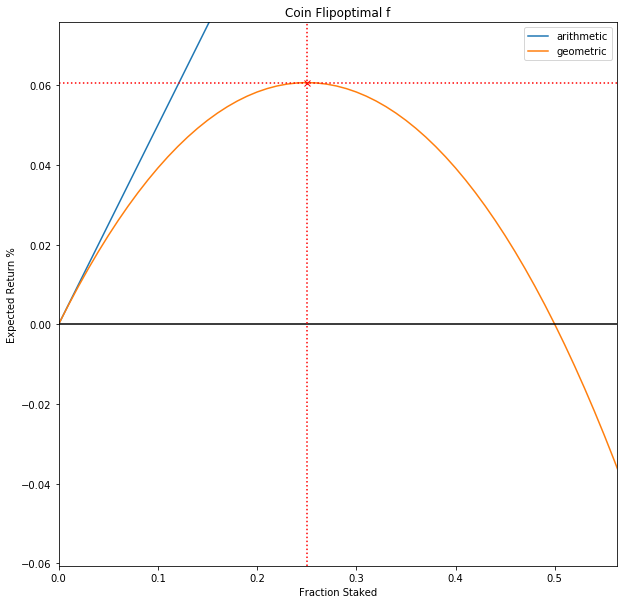

Optimal f: 0.25
Expected Value (arithmetic): 12.5%
Expected Value (geometric): 6.066%


In [11]:
coin_outcomes = np.array([2,-1])
coin_f = get_f(coin_outcomes)
f_plot(coin_f,title='Coin Flip')
f_result(coin_f)

下一个场景是掷骰子。现在让你下注。如果骰子出现偶数，韩梅梅付给你双倍的赌注。如果结果是奇数，你付给韩梅梅相同的倍数。我们看到这个游戏的算术期望是对你有利的。然而，为了评估这个游戏的几何平均收益，我们首先需要约束收益。如果你输五次，你付给韩梅梅5倍的赌注，你的赌资应该是你本金的1/5

In [22]:
def kelly_results(returns):
    bounded_rets = bound_returns(returns)
    kelly_f = kelly_fraction(bounded_rets) / worst_losses(returns)
    
    exp_arith_kelly = expected_arith(bounded_rets * kelly_f)
    exp_geom_kelly = expected_geom(bounded_rets * kelly_f)
    
    print('Kelly f: {}'.format(np.round(kelly_f,3)))
    print('Expected Value (arithmetic): {}%'.format(np.round(exp_arith_kelly * 100,5)))
    print('Expected Value (geometric): {}%'.format(np.round(exp_geom_kelly * 100,5)))

In [17]:
dice_outcomes = np.array([-1,2,-3,4,-5,6])
dice_outcomes_bounded = bound_returns(dice_outcomes)
dice_exp_arith = expected_arith(dice_outcomes) * 100
dice_exp_geom = expected_geom(dice_outcomes) * 100

print('Expected Value (arithmetic): {}%'.format(np.round(dice_exp_arith,3)))
print('Expected Value (geometric): {}%'.format(np.round(dice_exp_geom,3)))

Expected Value (arithmetic): 50.0%
Expected Value (geometric): -100.0%


我们再次看到，如果你冒太大的风险，一开始看起来不错的赌注最终会让你破产。我们可以使用凯利公式来尝试确定每次下注的最佳投放量。

In [23]:
kelly_results(dice_outcomes)

Kelly f: 0.025
Expected Value (arithmetic): 0.25%
Expected Value (geometric): 0.2314%


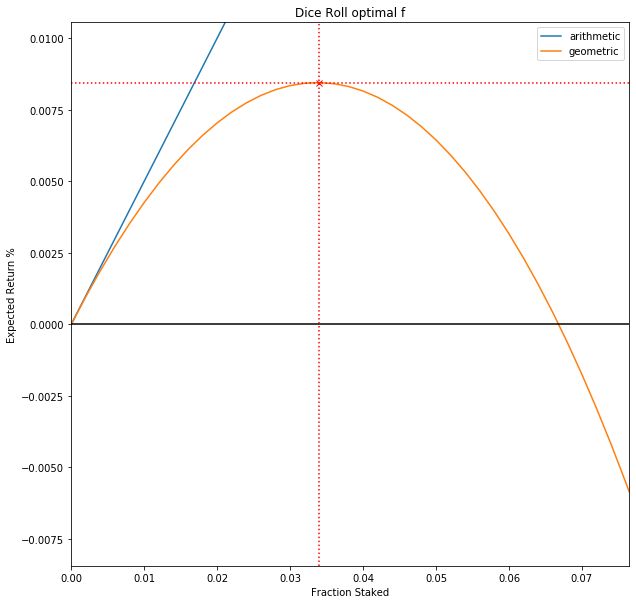

Optimal f: 0.034
Expected Value (arithmetic): 1.7000000000000002%
Expected Value (geometric): 0.844%


In [25]:
dice_f = get_f(dice_outcomes)
f_plot(dice_f,title='Dice Roll ')
f_result(dice_f)